In [ ]:
bron: https://www.kaggle.com/code/rawanmahmoud19/lung-cancer-prediction-using-ml-models/notebook

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Load data 

In [21]:
data=pd.read_csv('data/survey lung cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# Explore data

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [23]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.67,8.21,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.56,0.50,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.57,0.50,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.50,0.50,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.50,0.50,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.50,0.50,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.67,0.47,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.56,0.50,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.56,0.50,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.56,0.50,1.0,1.0,2.0,2.0,2.0


In [ ]:
def d_null(data):
    d_null=data.isna().sum()
    if d_null[d_null>0].any() :
        print(d_null[d_null>0])
    else:
        print('NO Missing')
d_null(data)

# een functie d_null(data) werd aangemaakt die controleert of er ontbrekende waarden (null-waarden) in een DataFrame aanwezig zijn. 

NO Missing


In [ ]:
data.duplicated().sum() #hij controleert ook op duplicaten

33

In [26]:
data.columns.tolist()

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

# Data cleaning 

In [27]:
data.columns=data.columns.str.lower() #zet de kolomnamen naar kleine letters

In [28]:
data.drop_duplicates(inplace=True) #verwijdert al de duplicaten in de oorspronkelijke data

In [29]:
data.shape #geeft het aantal rijen en kolommen weer

(276, 16)

In [30]:
data['lung_cancer'].replace({'YES':2,'NO':1},inplace=True) #vervangt de waarde YES met cijfer 2, en No met 1
data[['lung_cancer']]

,lung_cancer
0,2
1,2
2,1
3,1
4,1
...,...
279,2
280,1
281,1
282,1


In [31]:
data['gender'].replace({'M':1,'F':0},inplace=True)  #vervangt de waarde M met cijfer 1, en F met 0
data[['gender']]

,gender
0,1
1,1
2,0
3,1
4,0
...,...
279,0
280,0
281,1
282,1


In [32]:
data.info() #geeft een overzicht van de data (kolomnamen, aantal niet lege waardes,datatypes etc)

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 276 non-null    int64
 1   age                    276 non-null    int64
 2   smoking                276 non-null    int64
 3   yellow_fingers         276 non-null    int64
 4   anxiety                276 non-null    int64
 5   peer_pressure          276 non-null    int64
 6   chronic disease        276 non-null    int64
 7   fatigue                276 non-null    int64
 8   allergy                276 non-null    int64
 9   wheezing               276 non-null    int64
 10  alcohol consuming      276 non-null    int64
 11  coughing               276 non-null    int64
 12  shortness of breath    276 non-null    int64
 13  swallowing difficulty  276 non-null    int64
 14  chest pain             276 non-null    int64
 15  lung_cancer            276 non-null    int64


# EDA 

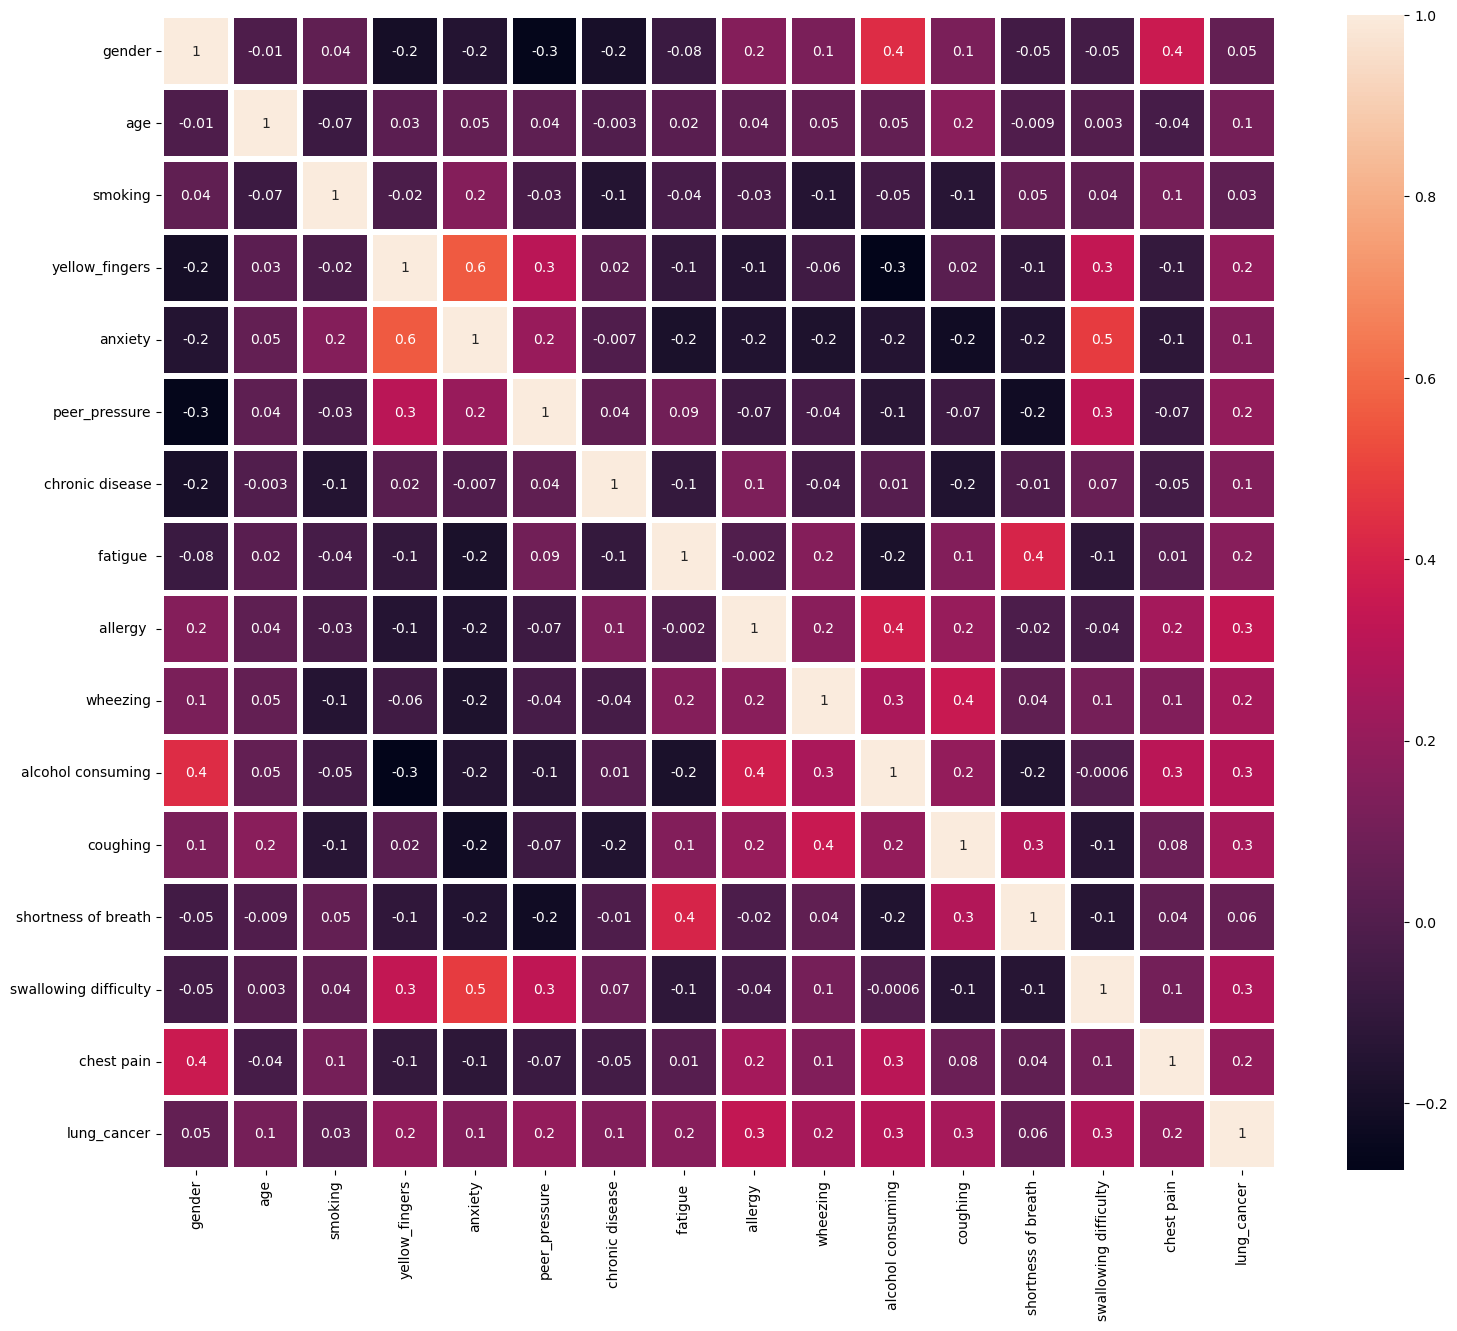

In [33]:
corr_matrix=data.corr() #correlatiematrix
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix,annot=True,linewidths=4,fmt='.1g',)
plt.show()

## Age

In [34]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [35]:
data['age'].value_counts() #aantal keer elke leeftijd voorkomt

age
64    18
60    16
56    16
62    16
59    15
63    15
70    14
61    14
67    11
69    10
55    10
72    10
68     9
71     9
57     9
77     9
58     8
54     7
74     6
65     5
51     5
75     5
73     4
52     4
53     4
66     4
76     3
47     3
49     3
48     2
44     2
78     2
81     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

In [36]:
len(data[data.age<49]) #aantal leeftijd kleiner dan 49

11

Text(0.5, 1.0, 'Age Distribution')

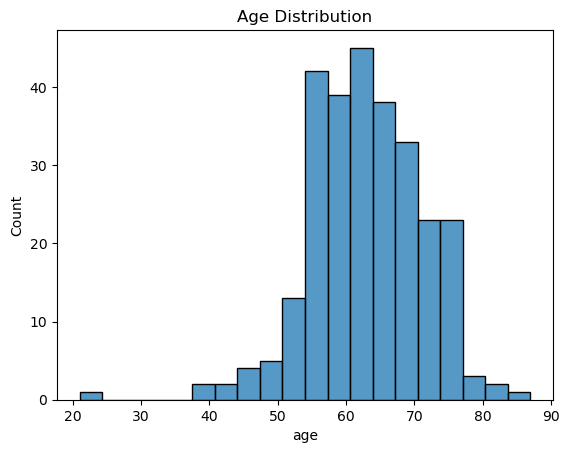

In [37]:
sns.histplot(x='age',data=data)# de verdeling van leeftijden in een dataset te bekijken.
plt.title('Age Distribution')

In [38]:
scipy.stats.spearmanr(data['age'],data['lung_cancer'])  #p> 0.05 => er is geen statistisch significant bewijs om de nulhypothese te verwerpen.
# = er is geen significant bewijs voor een monotone relatie tussen de leeftijd en longkanker in deze gegevens

SignificanceResult(statistic=0.09656644092639528, pvalue=0.10943355450879182)

In [39]:
age_data=data[['age','chest pain','coughing', 'swallowing difficulty']] # de correlatie wordt berekend tussen de 'age' en 'chest pain', 'coughing', en 'swallowing difficulty'.
age_data.corr()  

,age,chest pain,coughing,swallowing difficulty
age,1.000000,-0.035806,0.168654,0.003199
chest pain,-0.035806,1.000000,0.077988,0.102674
coughing,0.168654,0.077988,1.000000,-0.136885
swallowing difficulty,0.003199,0.102674,-0.136885,1.000000


In [40]:
age_gr=data.groupby('age',as_index=False)[['chest pain','coughing', 'swallowing difficulty']].value_counts()
gr=pd.DataFrame(age_gr)
gr

,age,chest pain,coughing,swallowing difficulty,count
0,21,1,1,1,1
1,38,2,2,1,1
2,39,2,1,1,1
3,44,2,1,2,1
4,44,1,1,2,1
...,...,...,...,...,...
158,78,2,1,2,1
159,79,2,2,2,1
160,81,2,2,2,1
161,81,1,2,1,1


## Gender

In [41]:
data.gender.value_counts() #aantal keer dat elk geslacht voorkomt

gender
1    142
0    134
Name: count, dtype: int64

In [42]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

<Axes: xlabel='gender'>

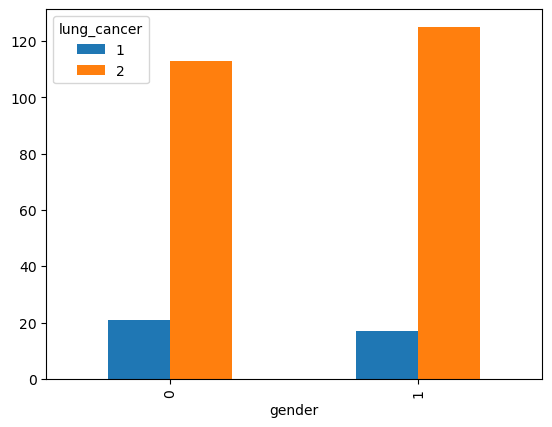

In [43]:
sex=pd.crosstab(data.gender,data['lung_cancer']) #longkanker/geen longkanker, vs geslacht m/v
sex.plot.bar()

In [44]:
data.groupby(['gender', 'peer_pressure','lung_cancer']).agg({'age': ['min', 'max', 'mean']})

age               
                                 min max       mean
gender peer_pressure lung_cancer                   
0      1             1            21  87  60.833333
                     2            38  75  63.433333
       2             1            57  64  60.000000
                     2            44  81  63.457831
1      1             1            46  69  58.200000
                     2            48  79  63.230769
       2             1            59  69  64.142857
                     2            39  78  62.872340

In [45]:
data.groupby(['gender', 'anxiety','lung_cancer']).agg({'age': ['min', 'max', 'mean']})

age               
                           min max       mean
gender anxiety lung_cancer                   
0      1       1            21  87  60.882353
               2            38  81  63.850000
       2       1            55  68  60.000000
               2            44  81  63.232877
1      1       1            47  69  61.111111
               2            39  79  62.287671
       2       1            46  68  60.125000
               2            52  77  64.230769

In [46]:
data.groupby(['gender', 'chest pain','lung_cancer']).agg({'age': ['min', 'max', 'mean']})

age               
                              min max       mean
gender chest pain lung_cancer                   
0      1          1            21  87  61.000000
                  2            44  81  63.738462
       2          1            57  59  58.000000
                  2            38  81  63.062500
1      1          1            55  68  61.571429
                  2            52  77  63.967742
       2          1            46  69  60.000000
                  2            39  79  62.808511

In [47]:
#weak positive 
scipy.stats.spearmanr(data['gender'],data['lung_cancer'])

SignificanceResult(statistic=0.0536655779607626, pvalue=0.3744582204386846)

In [48]:
gr=data.groupby('gender',as_index=False)[['age','lung_cancer']].value_counts()
female=gr[gr['gender']==0]
fem_gr=pd.DataFrame(female)


In [49]:
male=gr[gr['gender']==1]
male_gr=pd.DataFrame(male)
male_gr #laat het aantallen per leeftijd en longkankerstatus voor mannen zien.

,gender,age,lung_cancer,count
49,1,62,2,10
50,1,64,2,9
51,1,63,2,8
52,1,60,2,8
53,1,70,2,7
54,1,67,2,6
55,1,56,2,6
56,1,58,2,6
57,1,59,2,5
58,1,69,2,5


## smoking

In [50]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [51]:
data.smoking.value_counts()

smoking
2    150
1    126
Name: count, dtype: int64

In [52]:
sm=pd.crosstab(data.smoking,data['lung_cancer']) # kruistabel om te onderzoeken of er een verband bestaat tussen roken en het hebben van longkanker
sm

lung_cancer,1,2
smoking,,
1,19,107
2,19,131


<Axes: xlabel='smoking', ylabel='count'>

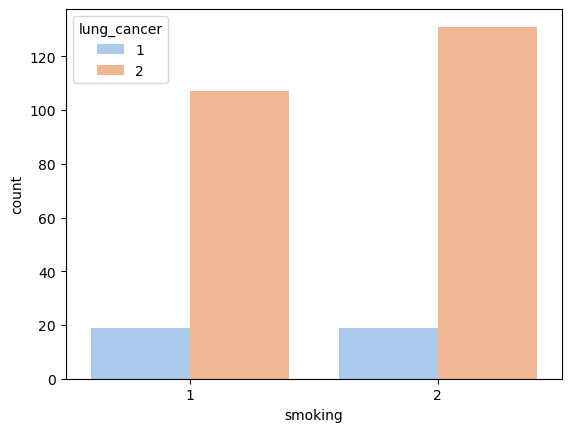

In [53]:
sns.countplot(x='smoking',hue='lung_cancer',data=data,palette='pastel') #rokers/niet rokers vs kanker/geenKanker

In [54]:
scipy.stats.spearmanr(data['smoking'],data['lung_cancer'])

SignificanceResult(statistic=0.03487816787960422, pvalue=0.5639492701946421)

In [55]:
# De Spearman's correlatietest toont een zeer zwakke positieve correlatie van 0.0348 tussen roken en longkanker, met een p-waarde van 0.564. 
# Aangezien de p-waarde veel groter is dan 0.05, is het resultaat niet statistisch significant, wat betekent dat er geen sterk bewijs is voor een 
# verband tussen roken en longkanker in deze dataset.

<Axes: >

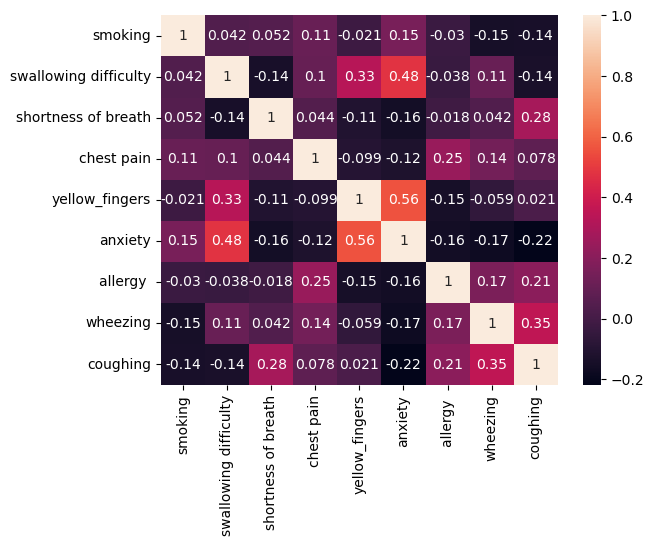

In [56]:
data_sm=data[['smoking','swallowing difficulty','shortness of breath','chest pain','yellow_fingers', 'anxiety','allergy ', 'wheezing','coughing']]
sm_corr=data_sm.corr()
sns.heatmap(sm_corr,annot=True)

<Axes: xlabel='smoking'>

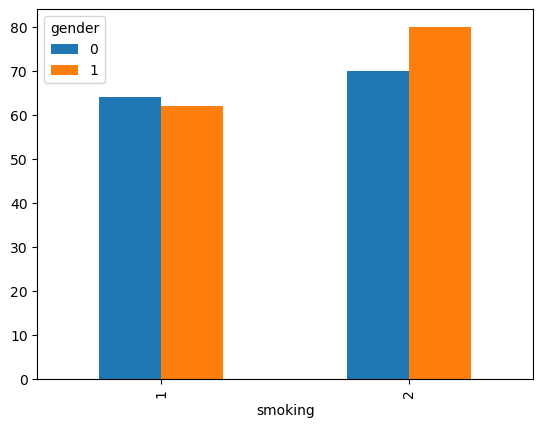

In [57]:
pd.crosstab(data.smoking,data.gender).plot.bar()

In [58]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

<Axes: xlabel='smoking'>

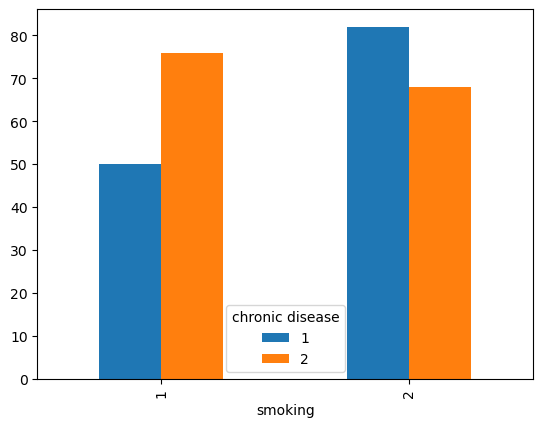

In [59]:
pd.crosstab(data.smoking,data['chronic disease']).plot.bar()

<Axes: xlabel='smoking'>

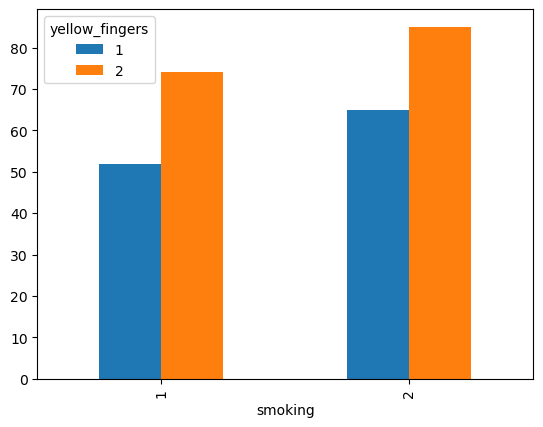

In [60]:
pd.crosstab(data.smoking,data['yellow_fingers']).plot.bar()

<Axes: xlabel='smoking'>

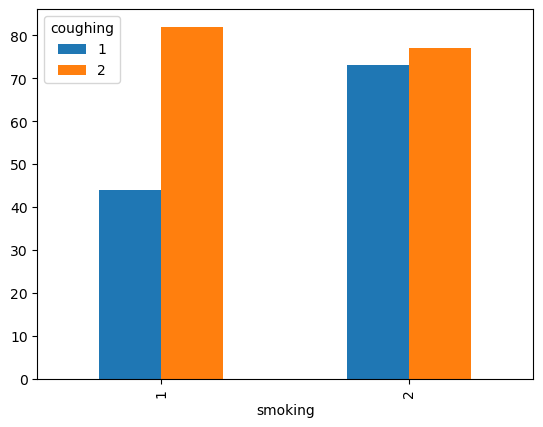

In [61]:
pd.crosstab(data.smoking,data['coughing']).plot.bar()

<Axes: xlabel='smoking'>

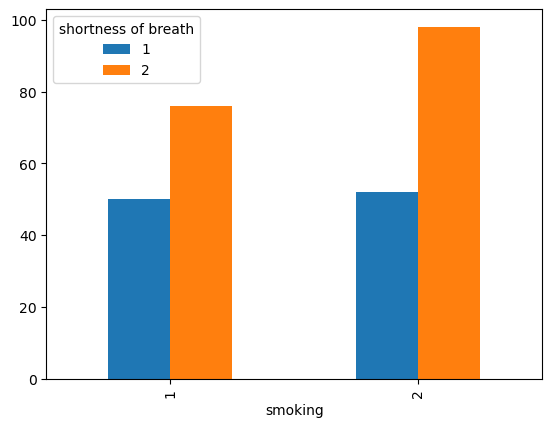

In [62]:
pd.crosstab(data.smoking,data['shortness of breath']).plot.bar()

## lung cancer 

In [63]:
data.lung_cancer.value_counts()

lung_cancer
2    238
1     38
Name: count, dtype: int64

In [64]:
scipy.stats.spearmanr(data['chest pain'],data['lung_cancer'])
#De correlatiecoëfficiënt is 0.1949 & p <0,05 => een lichte positieve correlatie tussen de twee variabelen. er is een zwak positief verband tussen de variabelen.

SignificanceResult(statistic=0.1948557222318186, pvalue=0.0011389714581002597)

In [65]:
scipy.stats.spearmanr(data['alcohol consuming'],data['lung_cancer'])
#De correlatiecoëfficiënt is 0.2944 & p<0,05 => een lichte/matige positieve correlatie tussen de twee variabelen. er is een zwak positief verband tussen de variabelen.

SignificanceResult(statistic=0.2944221403875563, pvalue=6.36085868778738e-07)

In [66]:
scipy.stats.spearmanr(data['peer_pressure'],data['lung_cancer'])
#De correlatiecoëfficiënt is 0.1951 & p <0,05 => een lichte positieve correlatie tussen de twee variabelen. er is een zwak positief verband tussen de variabelen.

SignificanceResult(statistic=0.19508605044975108, pvalue=0.0011233493083850593)

In [67]:
scipy.stats.spearmanr(data['anxiety'],data['lung_cancer'])
#De correlatiecoëfficiënt is 0.1443 & p <0,05 => een lichte positieve correlatie tussen de twee variabelen. er is een zwak positief verband tussen de variabelen.

SignificanceResult(statistic=0.14432182569353633, pvalue=0.016424339633146007)

Number of unique values ("gender"): 2
        count
gender       
Yes       142
0         134


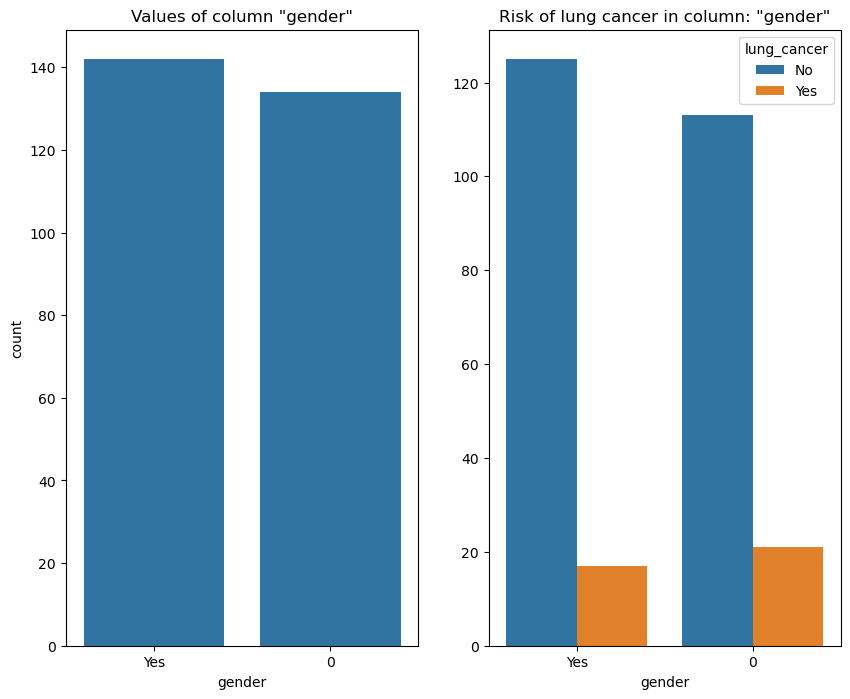

Number of unique values ("smoking"): 2
         count
smoking       
No         150
Yes        126


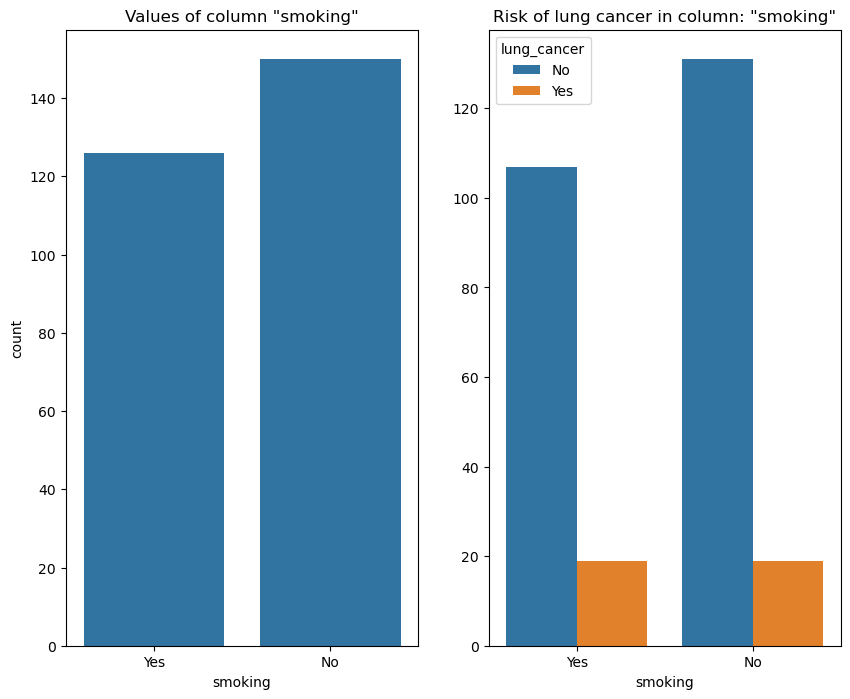

Number of unique values ("yellow_fingers"): 2
                count
yellow_fingers       
No                159
Yes               117


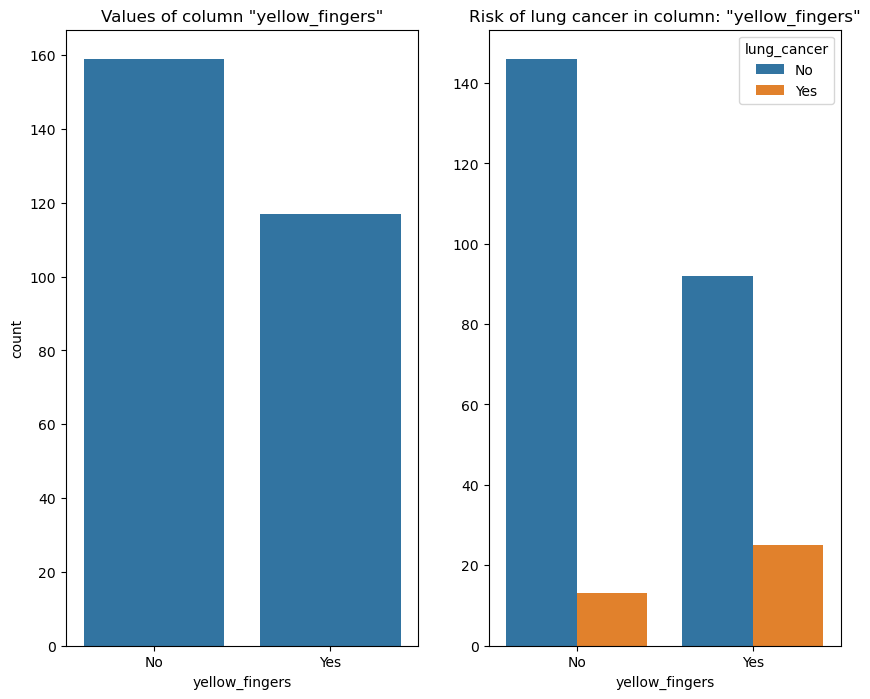

Number of unique values ("anxiety"): 2
         count
anxiety       
Yes        139
No         137


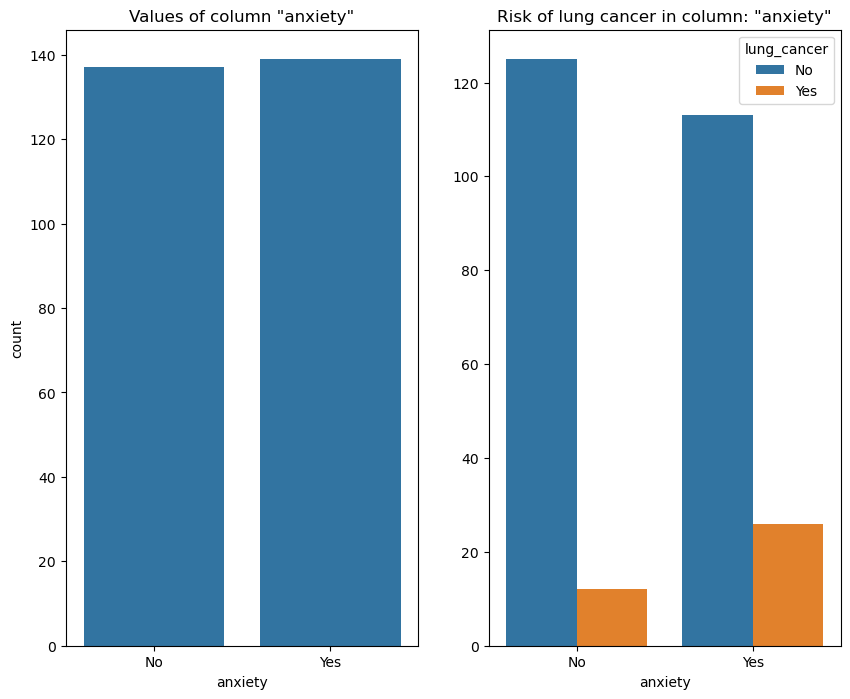

Number of unique values ("peer_pressure"): 2
               count
peer_pressure       
No               140
Yes              136


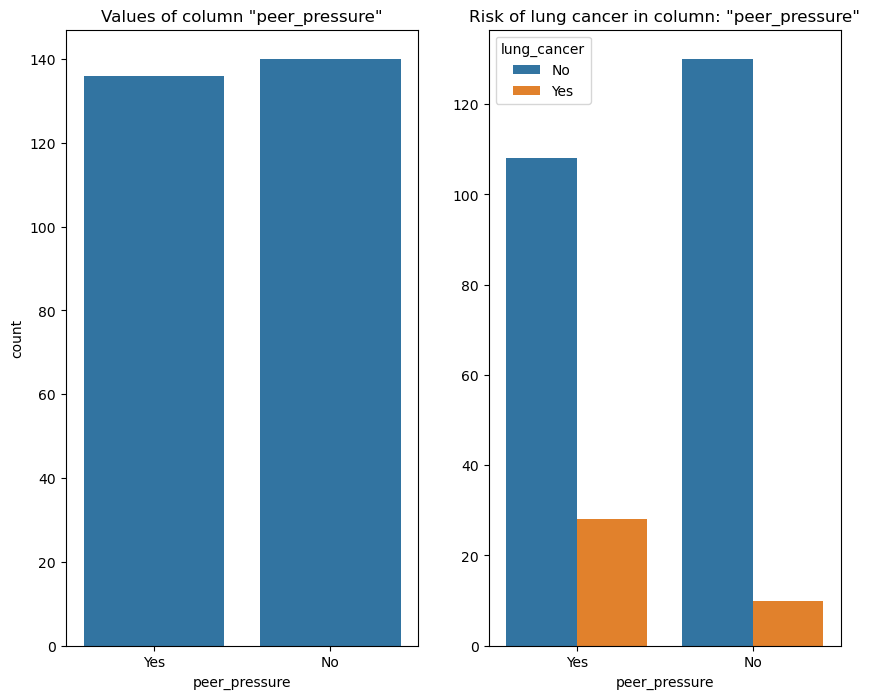

Number of unique values ("chronic disease"): 2
                 count
chronic disease       
No                 144
Yes                132


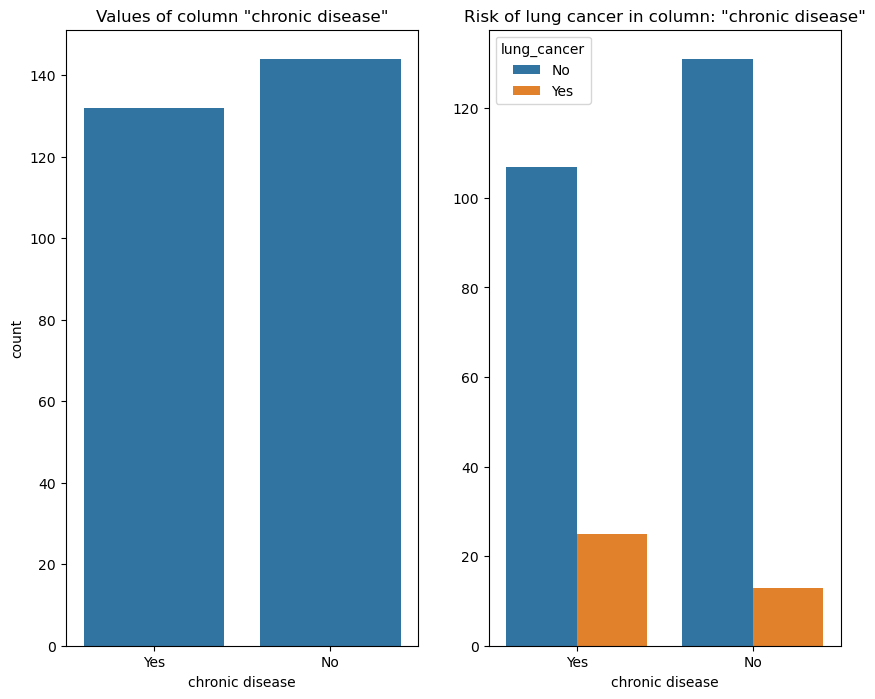

Number of unique values ("fatigue "): 2
          count
fatigue        
No          183
Yes          93


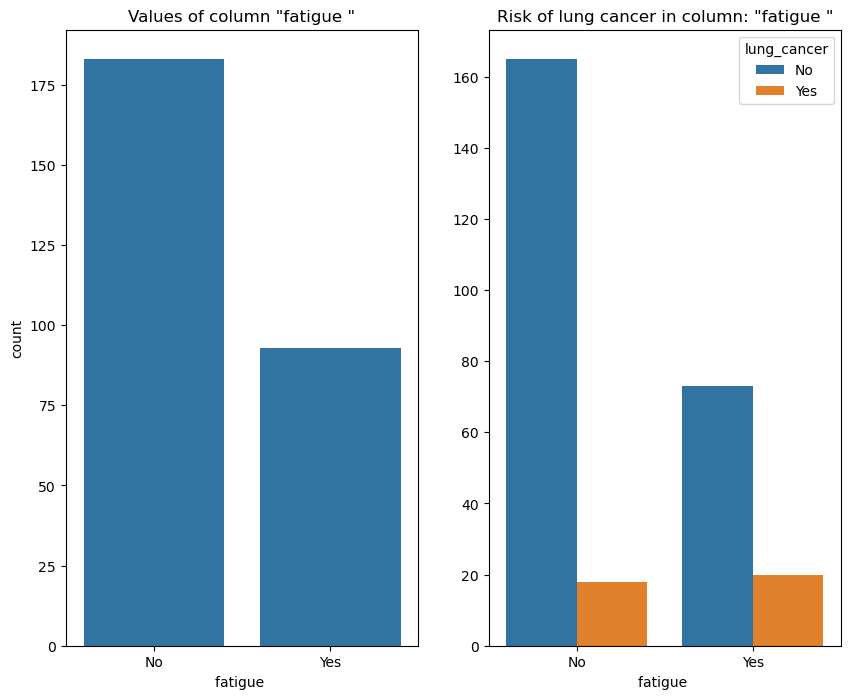

Number of unique values ("allergy "): 2
          count
allergy        
No          151
Yes         125


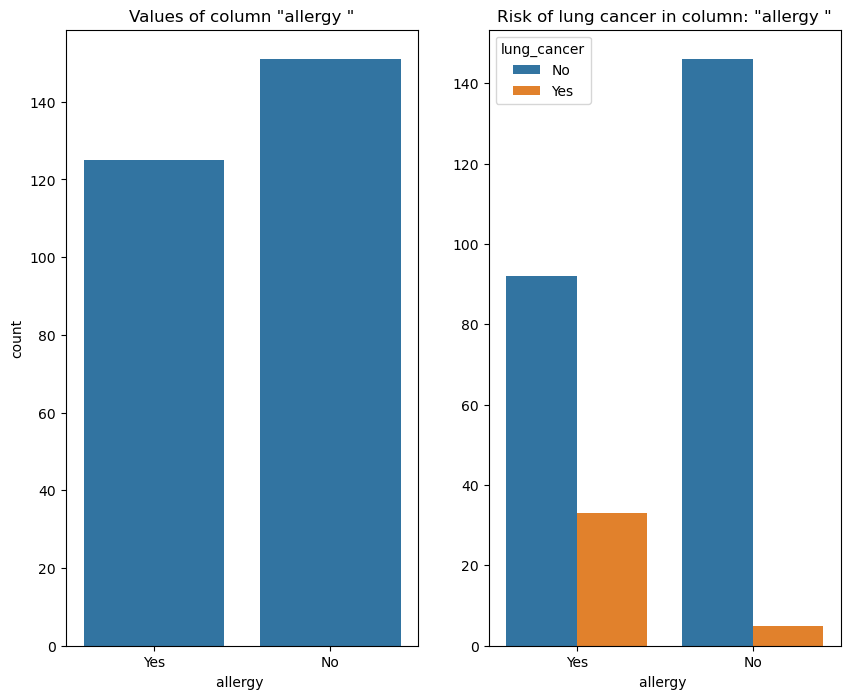

Number of unique values ("wheezing"): 2
          count
wheezing       
No          151
Yes         125


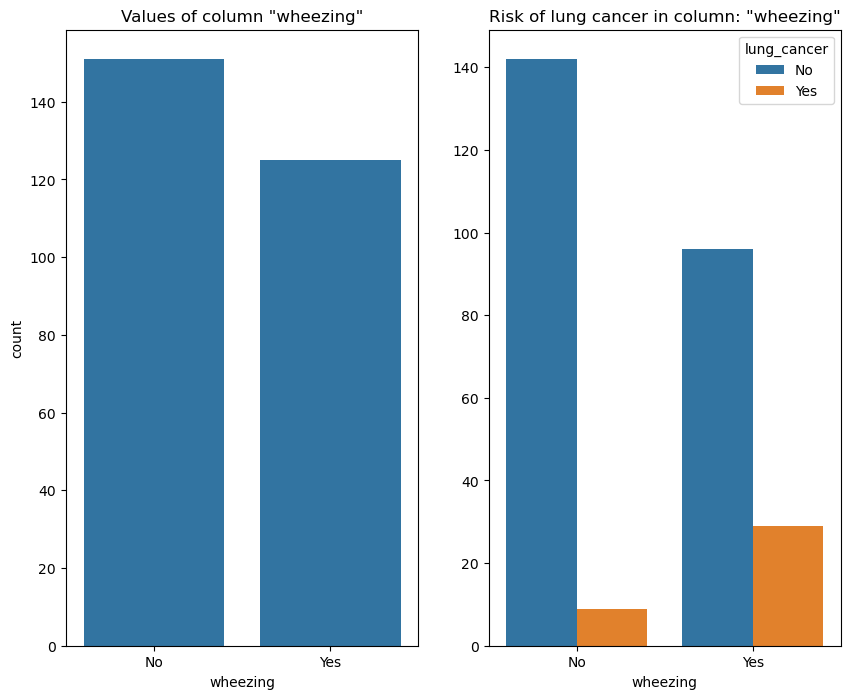

Number of unique values ("alcohol consuming"): 2
                   count
alcohol consuming       
No                   152
Yes                  124


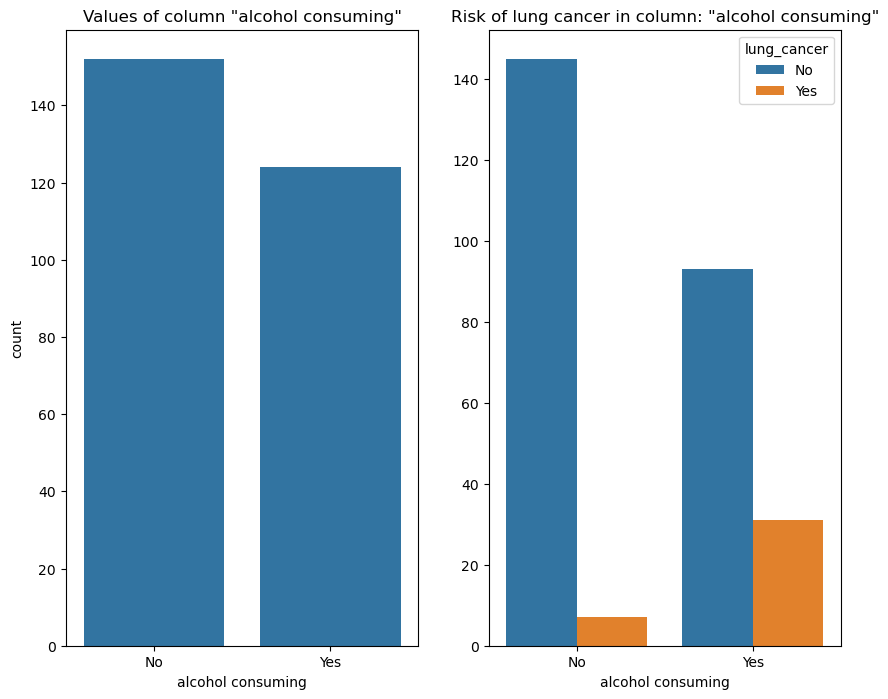

Number of unique values ("coughing"): 2
          count
coughing       
No          159
Yes         117


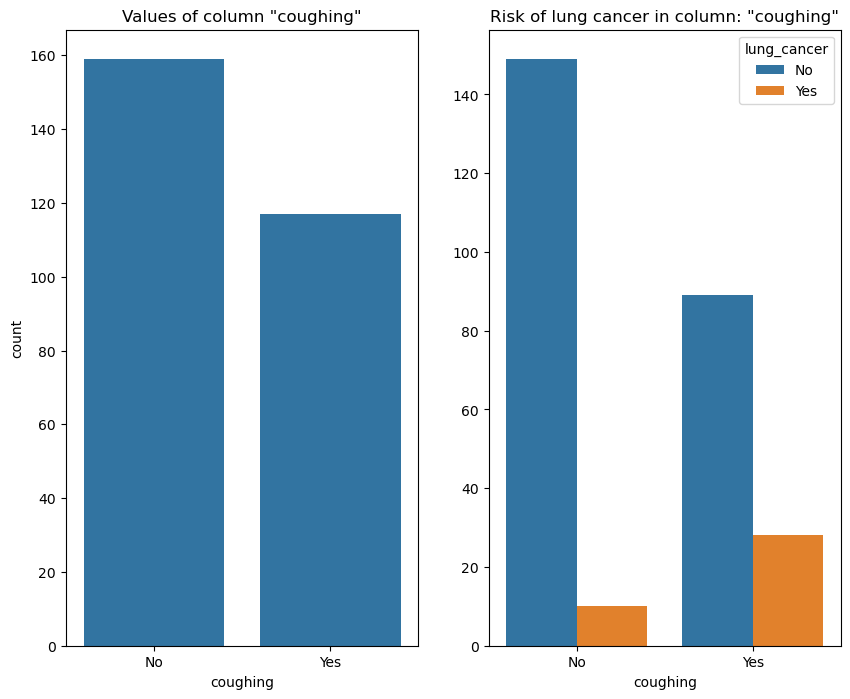

Number of unique values ("shortness of breath"): 2
                     count
shortness of breath       
No                     174
Yes                    102


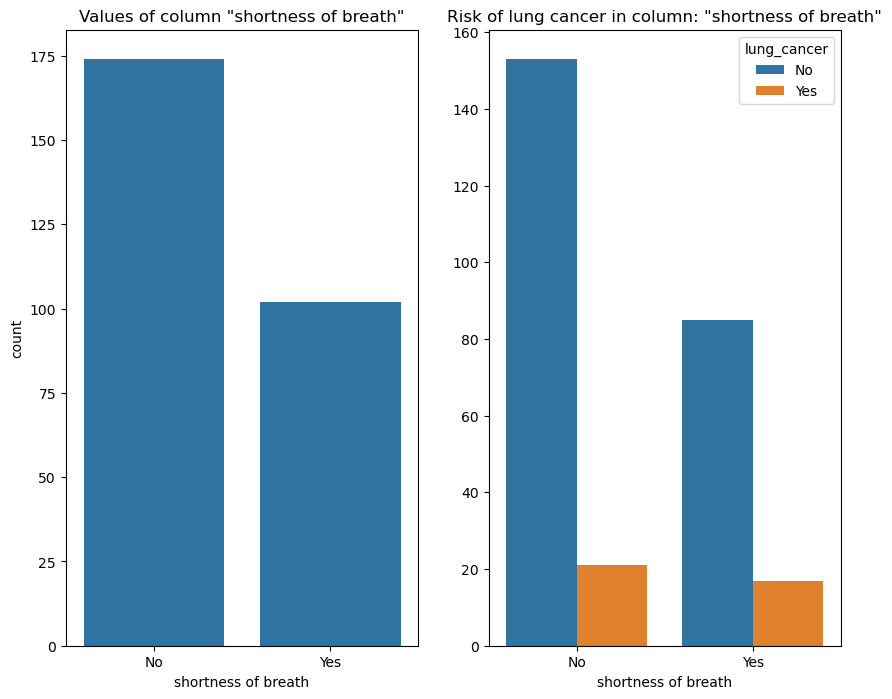

Number of unique values ("swallowing difficulty"): 2
                       count
swallowing difficulty       
Yes                      147
No                       129


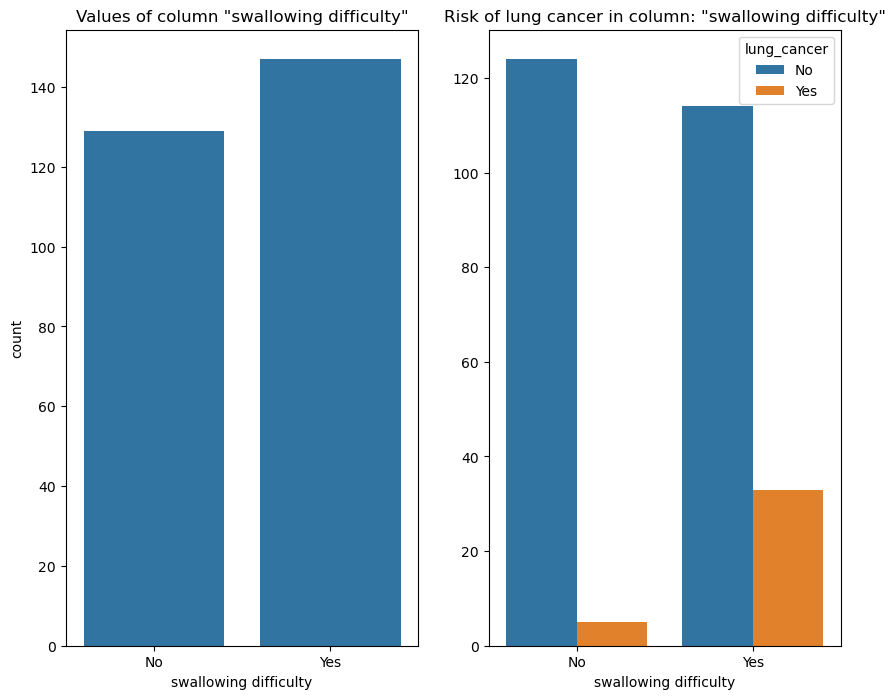

Number of unique values ("chest pain"): 2
            count
chest pain       
No            154
Yes           122


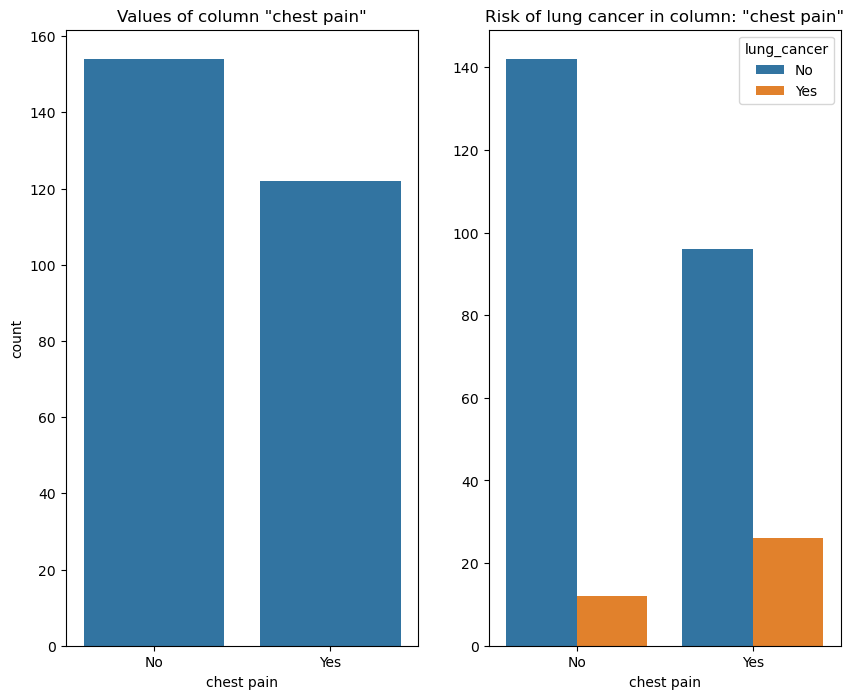

In [68]:
def plot_col(dataframe):
    dataframe = data.drop(['age'], axis=1)
    dataframe = dataframe.astype('str')
    dataframe = dataframe.replace({'1':'Yes', '2':'No'})

    for col in dataframe.columns:
        if col != 'lung_cancer':
            print(f'Number of unique values ("{col}"): {dataframe[col].nunique()}')
            print(pd.DataFrame(dataframe[col].value_counts()))
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
            sns.countplot(data=dataframe, x=col, hue='lung_cancer', ax=ax[1]);
            ax[1].set_title(f'Risk of lung cancer in column: "{col}"')
            ax[1].set_ylabel('')
            sns.countplot(data=dataframe, x=col, ax=ax[0]);
            ax[0].set_title(f'Values of column "{col}"')
            plt.show()

plot_col(data)  #een visuele weergaven van de verdelingen per kolom (kolom leeftijd niet inbegrepen) en hoe ze zich verhouden tot wel/geen longkanker

In [69]:
pd.crosstab(data['lung_cancer'],data['swallowing difficulty'],margins=True) 


swallowing difficulty,1,2,All
lung_cancer,,,
1,33,5,38
2,114,124,238
All,147,129,276


# split data feature & target 

In [70]:
x=data.drop('lung_cancer',axis=1)
y=data['lung_cancer']

# scale feature data 

In [ ]:
scale = StandardScaler()
xscale = scale.fit_transform(x) #alle x waardes worden gestandaardScaled

# Split train & test data 

In [73]:
x_train,x_test,y_train,y_test=train_test_split(xscale,y,test_size=0.2,random_state=42)

# Build model

In [74]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()
svc=SVC()
xgb=XGBClassifier()

In [75]:
#label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [76]:
def all(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_test=accuracy_score(y_pred,y_test)*100
    accuracy_train=model.score(x_train,y_train)*100
    print('accuracy after train model :',accuracy_train)
    print('accuracy after test  model :',accuracy_test)

In [ ]:
#hier wordt een functie gemaakt die de accuracy van de train en test model evalueert
# maar met een unbalance targetklasse (Y bestaat uit 86% Yes targetwaardes en 14% No) kan de nauwkeurigheid een vertekend beeld geven. 
# Het model kan bijvoorbeeld altijd Yes voorspellen en nog steeds een hoge nauwkeurigheid halen, terwijl het model niet goed presteert op No.
# Het is beter om ook andere evaluatiemethoden te gebruiken, zoals precision, recall, f1-score, ROC-AUC bij unbalanced klasses.

In [77]:
all(log_reg)

accuracy after train model : 93.18181818181817
accuracy after test  model : 92.85714285714286


In [78]:
all(rf_clf)

accuracy after train model : 100.0
accuracy after test  model : 87.5


In [79]:
all(svc)

accuracy after train model : 94.54545454545455
accuracy after test  model : 83.92857142857143


In [80]:
all(xgb)

accuracy after train model : 100.0
accuracy after test  model : 89.28571428571429


In [81]:
len(data.columns)

16

# Evaluate model

In [82]:
def cm(model):
    y_pred=model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='Greens')
    plt.title('Confusion Matrix')
    plt.show()

<Figure size 800x600 with 0 Axes>

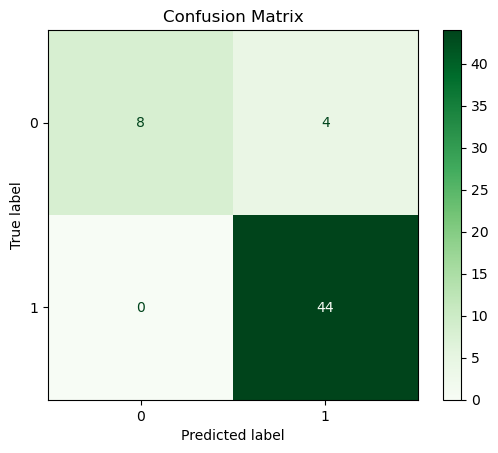

In [83]:
cm(log_reg)

In [84]:
def class_report(model):
    y_pred=model.predict(x_test)
    report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
    print("Classification Report:\n", report)

In [85]:
class_report(log_reg)

Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      0.67      0.80        12
   Malignant       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



In [ ]:
#Benign staan voor de klasse die geen kanker aangeeft (No), en Malignant voor kanker (Yes).